## Business understanding

I am going to analyse two wine datasets containing chemical properties and quality scores of red and white Vinho Verde wines from Portugal. My interest in the analysis here is to try and understand if quality cqn be objective infered just from the chemical attributes of a wine.

From the initial exploration of this dataset I came up with the following questions that I wanted to answer: <br>
**What are the strongest correlations present amongst variables? <br>
What are the main differences between white and red wines in the dataset? <br>
Is it possible to accurately class wine by quality based on their chemical makeup?** <br>

## Data understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
## adding a type column to the two datasets to prepare for a concatenation
red['type'] = 'red'
white['type'] = 'white'

In [6]:
## stacking both dataframes into one
df = pd.concat([red, white], ignore_index=True, axis=0)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.groupby('type')['type'].count()

type
red      1599
white    4898
Name: type, dtype: int64

In [9]:
df.shape

(6497, 13)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


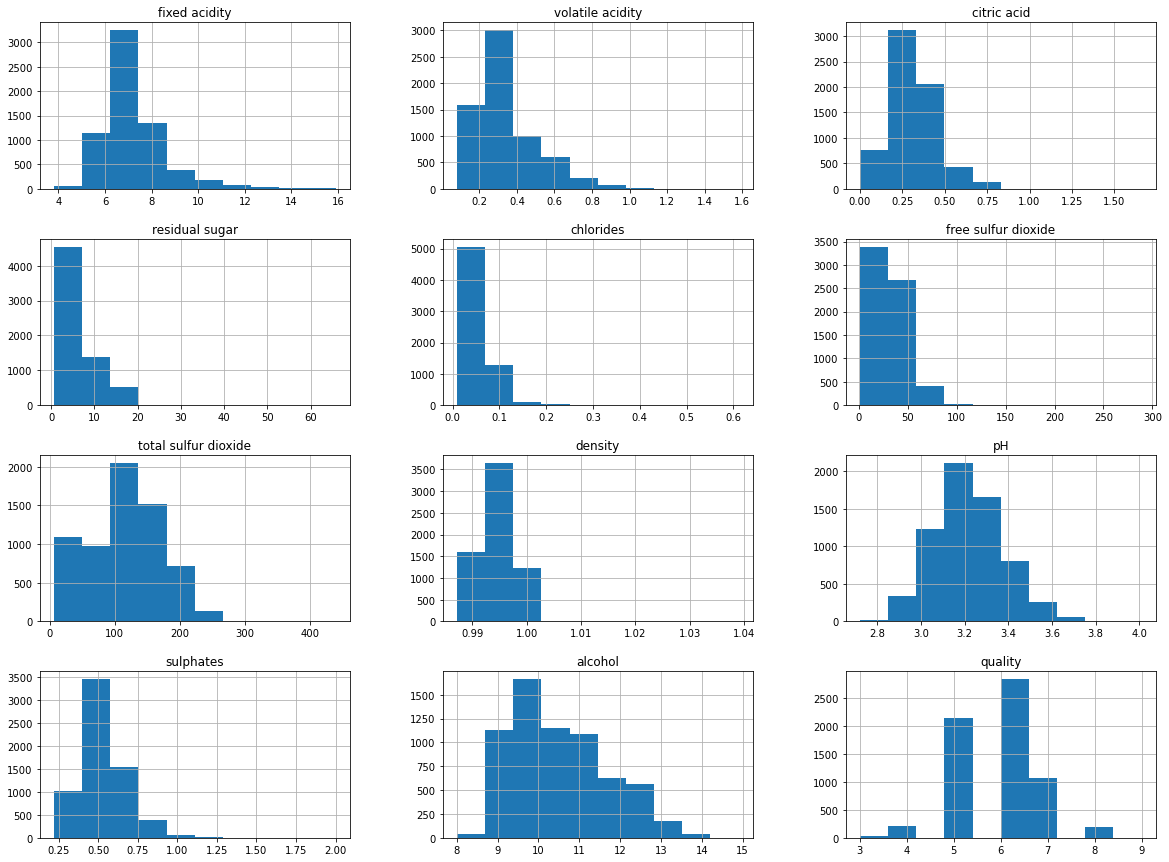

In [11]:
df.hist(figsize=(20, 15));

## Prepare data

In [12]:
## let's first replaces the spaces in the column names with underscores

def columns_renaming(dataframe):
    """
    Replaces spaces with underscores in all column names of a dataframe.
    
    Parameters:
    dataframe - Panda dataframe which columns' names should be renamed.
    
    Returns:
    Dataframe with renamed columns.
    
    """
    columns = []
    for column in df.columns:
        columns.append(column.replace(' ','_'))
    
    df.columns = columns
    
    return df

columns_renaming(df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [13]:
## creating a new dataframe to easily compare averages between red and white wines
df_by_type = df.groupby('type').mean().reset_index().transpose()

In [14]:
df_by_type

,0,1
type,red,white
fixed_acidity,8.319637,6.854788
volatile_acidity,0.527821,0.278241
citric_acid,0.270976,0.334192
residual_sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free_sulfur_dioxide,15.874922,35.308085
total_sulfur_dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267


In [15]:
df_by_type.columns=['red','white']

In [16]:
## removing the first line as it useless with the new column names
df_by_type.drop(index=df_by_type.index[0], axis=0, inplace=True)

In [17]:
df_by_type['red'] = pd.to_numeric(df_by_type['red'],errors='coerce')

In [18]:
df_by_type['white'] = pd.to_numeric(df_by_type['white'],errors='coerce')

In [19]:
## creating a new column with percentage difference in means
df_by_type['diff_perc'] = (df_by_type['white'] - df_by_type['red']) / df_by_type['white'] *100

In [20]:
df_by_type

,red,white,diff_perc
fixed_acidity,8.319637,6.854788,-21.369730
volatile_acidity,0.527821,0.278241,-89.698961
citric_acid,0.270976,0.334192,18.916069
residual_sugar,2.538806,6.391415,60.277880
chlorides,0.087467,0.045772,-91.090320
free_sulfur_dioxide,15.874922,35.308085,55.038848
total_sulfur_dioxide,46.467792,138.360657,66.415459
density,0.996747,0.994027,-0.273564
pH,3.311113,3.188267,-3.853083
sulphates,0.658149,0.489847,-34.358077


## Data Modeling

In [21]:
## Creating dummy variables for the type feature since it is a categorical variable 
df[['red', 'white']] = pd.get_dummies(df['type'])
df.drop('type', axis=1, inplace=True)

In [22]:
## checking if there are any NaN in the data as the model can't handle them
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
white                   0
dtype: int64

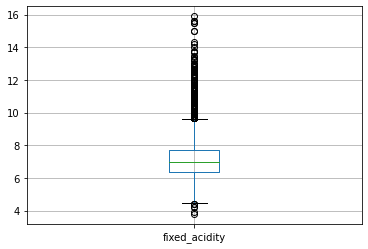

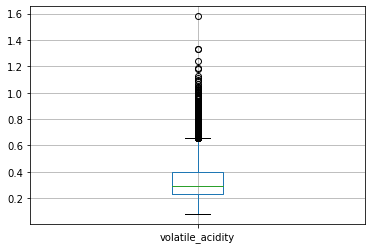

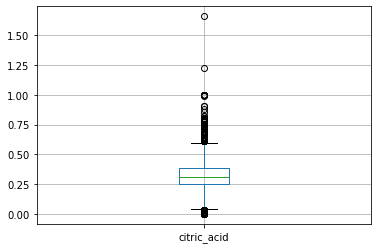

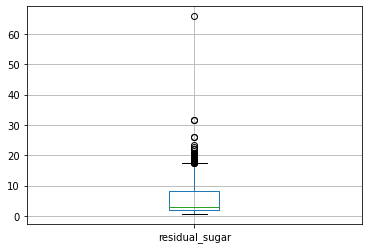

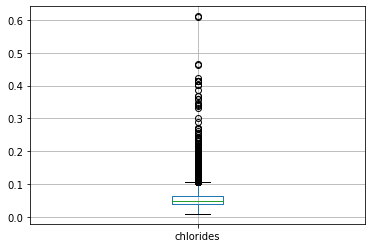

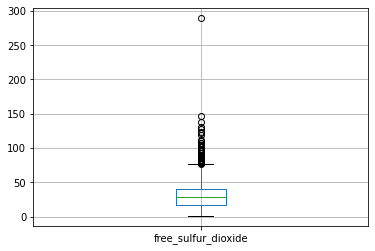

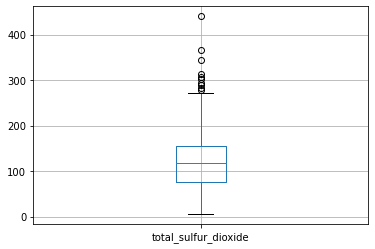

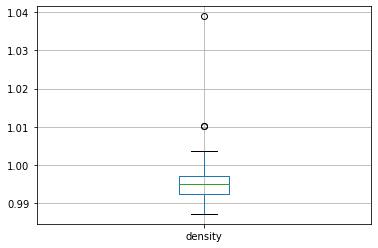

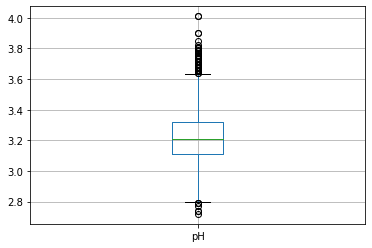

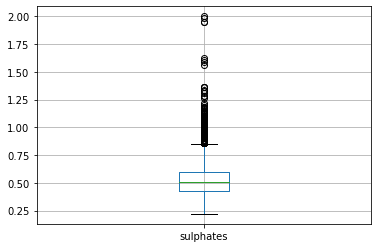

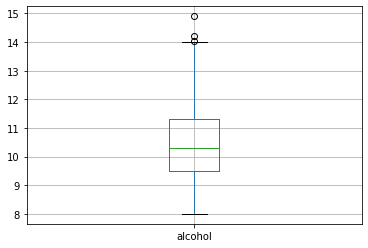

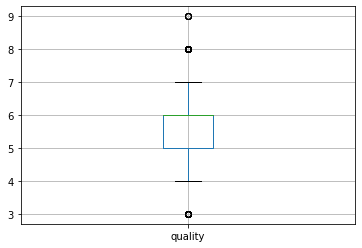

In [23]:
## visualising boxplots of features to check for outliers
for column in df.loc[:, ~df.columns.isin(['red', 'white'])]:
    plt.figure()
    df.boxplot([column])

In [24]:
## transforming quality scores into three quality classes to allow for the use of a classifier model
map = {3 : 'poor', 4 : 'poor', 5 : 'average', 6 : 'good', 7 :'good', 8 : 'good', 9 : 'good'}
df['quality'] = df['quality'].map(map)

In [25]:
df.quality.value_counts()

good       4113
average    2138
poor        246
Name: quality, dtype: int64

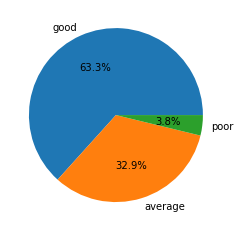

In [26]:
plt.pie(df.quality.value_counts(), labels = df.quality.value_counts().index, autopct='%1.1f%%');

In [27]:
y = df.quality
X = df.loc[:, df.columns != 'quality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [31]:
## instantiating the model
model = RandomForestClassifier()

In [32]:
## fitting the model
model.fit(X_train, y_train)

RandomForestClassifier()

## What are the strongest correlations present amongst variables?

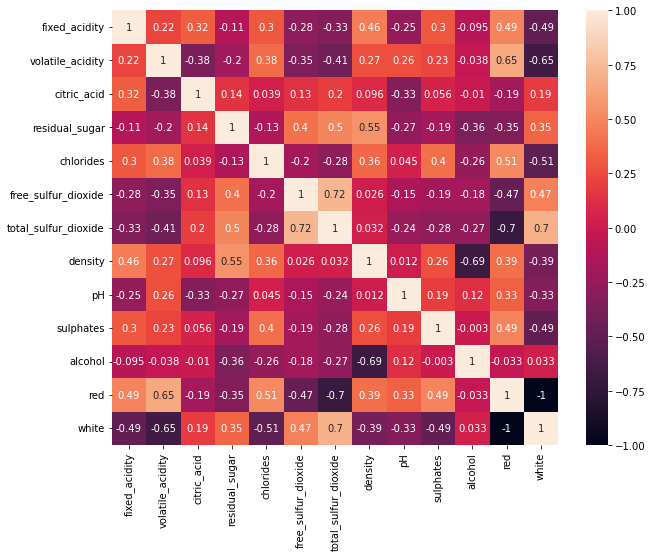

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True)
plt.show()

## What are the main differences between white and red wines in the dataset?

In [34]:
df_by_type.sort_values(by='diff_perc', ascending=False).style.bar(subset=['diff_perc'], align='mid', color=['#d65f5f', '#e2eba3'])

,red,white,diff_perc
total_sulfur_dioxide,46.467792,138.360657,66.415459
residual_sugar,2.538806,6.391415,60.277880
free_sulfur_dioxide,15.874922,35.308085,55.038848
citric_acid,0.270976,0.334192,18.916069
quality,5.636023,5.877909,4.115185
alcohol,10.422983,10.514267,0.868191
density,0.996747,0.994027,-0.273564
pH,3.311113,3.188267,-3.853083
fixed_acidity,8.319637,6.854788,-21.369730
sulphates,0.658149,0.489847,-34.358077


## Is it possible to accurately class wine by quality based on their chemical makeup?

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.75      0.70      0.72       532
        good       0.83      0.91      0.87      1019
        poor       0.60      0.08      0.14        74

    accuracy                           0.80      1625
   macro avg       0.73      0.56      0.58      1625
weighted avg       0.79      0.80      0.79      1625



## Evaluating the results

With an overall f1-score of 0.82 the model does an OK job at classifying the wines by quality. What’s worth noting is that the model is very bad a identifying poor wines. In particular the low recall score reveals that when predicting on our test set 83% of wines classified as poor by the model actually belonged to one of the two other classes.

The overall performance of the model could be improved by fine tuning parameters and also potentially by testing other classifiers. But I think the main issue here is that the dataset is unbalanced (there are too few poor wines in particular).